Estas tareas para la práctica de Visión por Computador fueron realizadas por los alumnos:

Nauzet Déniz Perdomo,
Alejandro Rodríguez Moreno

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Crea una imagen, p.e. 800x800, con la textura del tablero de ajedrez

(800, 800, 1)


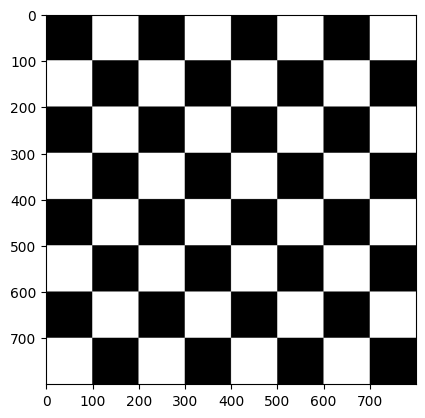

In [5]:
ajedrez = np.zeros((800,800,1), dtype = np.uint8)

x=y=0
black =1

while y != 900:
    while x != 900:
        if black == 1:
            ajedrez[x:x+100,y:y+100,:] = 0
            black = 0
        else:
            ajedrez[x:x+100,y:y+100,:] = 255
            black = 1
        x +=100
    x = 0
    y += 100
    
#Dimensiones
print(ajedrez.shape)
#Visualiza sin especificar el mapa de color gris
plt.imshow(ajedrez, cmap="gray") 
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

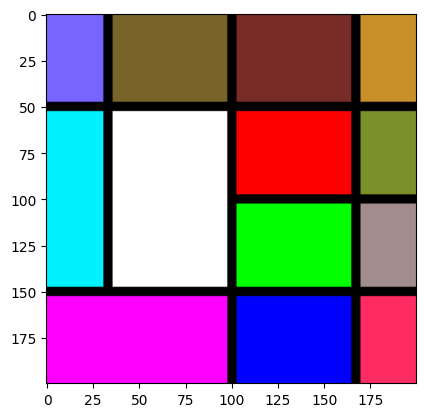

True

In [6]:
ancho = 200
alto = 300

#Crea una imagen con tres planos
color_img = np.zeros((200,200,3), dtype = np.uint8)
color_img[:,:,:] = 255

cv2.line(color_img,(int(ancho/2),0),(int(ancho/2),alto),(0,0,0),3)
cv2.line(color_img,(100,100),(200,100),(0,0,0),3)
cv2.line(color_img,(0,int(alto/6)),(ancho,int(alto/6)),(0,0,0),3)
cv2.line(color_img,(0,200-int(alto/6)),(ancho,200-int(alto/6)),(0,0,0),3)
cv2.line(color_img,(200-int(ancho/6),0),(200-int(ancho/6),alto),(0,0,0),3)
cv2.line(color_img,(int(ancho/6),0),(int(ancho/6),150),(0,0,0),3)


#Rectangle ---> imagen, INICIO vertice (x,y), FINAL vertice (x,y), grosor int o relleno -1
cv2.rectangle(color_img,(103,53),(200-int(ancho/6)-3,97),(255,0,0),-1)
cv2.rectangle(color_img,(103,103),(200-int(ancho/6)-3,147),(0,255,0),-1)
cv2.rectangle(color_img,(103,153),(200-int(ancho/6)-3,200),(0,0,255),-1)
cv2.rectangle(color_img,(0,153),(97,200),(255,0,255),-1)
cv2.rectangle(color_img,(0,53),(int(ancho/6)-3,147),(0,240,255),-1)
cv2.rectangle(color_img,(0,0),(int(ancho/6)-3,47),(120,100,255),-1)
cv2.rectangle(color_img,(int(ancho/6)+3,0),(97,47),(120,100,40),-1)
cv2.rectangle(color_img,(103,0),(197-int(ancho/6),47),(120,44,40),-1)
cv2.rectangle(color_img,(203-int(ancho/6),0),(200,47),(200,144,40),-1)
cv2.rectangle(color_img,(203-int(ancho/6),53),(200,97),(123,144,40),-1)
cv2.rectangle(color_img,(203-int(ancho/6),103),(200,147),(163,140,140),-1)
cv2.rectangle(color_img,(203-int(ancho/6),153),(200,200),(255,44,100),-1)


#Visualiza sin especificar el mapa de color gris
plt.imshow(color_img) 
plt.show()


#Salva la imagen resultante a disco
cv2.imwrite('imagen.jpg', color_img)

TAREA: Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen  ¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [5]:
# Función de refresco de los puntos de más y menos brillo
def refreshBrightness(ret, frame, w, h):
    maxBright = maxX = maxY = minX = minY = 0
    minBright = 765
    if ret:
        x = y = 0
        while x < w:
            while y < h:
                bright = int(frame[y, x, 2]) + int(frame[y, x, 1]) + int(frame[y, x, 0])
                if bright > maxBright:
                    maxX = x
                    maxY = y
                    maxBright = bright
                if bright < minBright:
                    minX = x
                    minY = y
                    minBright = bright
                y += 1
            y = 0
            x += 1
        return maxX, maxY, minX, minY

vid = cv2.VideoCapture(0)

# Dimensiones de la webcam
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Bucle donde se muestra los fotogramas de la webcam
while(True):
    ret, frame = vid.read()

    # Obtenemos los valores X e Y donde estan el pixel más y menos brillante
    maxX, maxY, minX, minY = refreshBrightness(ret, frame, w, h)

    # Añadimos los círculos a los píxeles 
    cv2.circle(frame,(maxX,maxY),3,(0,0,0),-1)
    cv2.circle(frame,(minX,minY),3,(255,255,255),-1)

    # Muestra imagen de webcam con los círculos
    if ret:
        cv2.imshow('Cam', frame)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

In [9]:
# Función de refresco de los puntos de más y menos brillo
def refreshBrightness8x8(ret, frame, w, h):
    maxBright = maxX = maxY = minX = minY = bright = 0
    minBright = 48960
    if ret:
        x = y = x1 = y1 = 0
        while x < w - 7:
            while y < h - 7:
                x1 = x
                while x1 < x + 8:
                    y1 = y
                    while y1 < y + 8:
                        bright += int(frame[y1,x1,2]) + int(frame[y1,x1,1]) + int(frame[y1,x1,0])
                        y1 += 1
                    x1 += 1
                if bright > maxBright:
                    maxX = x
                    maxY = y
                    maxBright = bright
                if bright < minBright:
                    minX = x
                    minY = y
                    minBright = bright
                bright = 0
                y += 1
            y = 0
            x += 1
        return maxX, maxY, minX, minY
    
vid = cv2.VideoCapture(0)

# Dimensiones de la webcam
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

timer = 501

# Bucle donde se muestra los fotogramas de la webcam
while(True):
    ret, frame = vid.read()
    
    # Temporizador para evitar ralentizar demasiado la webcam
    if timer > 500:
       # Obtenemos los valores X e Y donde estan el pixel más y menos brillante
       maxX, maxY, minX, minY = refreshBrightness8x8(ret, frame, w, h)
       timer = 0
       
    timer += 1

    # Añadimos los círculos a los píxeles 
    cv2.circle(frame,(maxX+3,maxY+3),4,(0,0,0),1)
    cv2.circle(frame,(minX+3,minY+3),4,(255,255,255),1)

    # Muestra imagen de webcam con los círculos
    if ret:
        cv2.imshow('Cam', frame)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Haz tu propuesta pop art

In [7]:
vid = cv2.VideoCapture(0)

ncells = 15

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Dimensiones originales
        h, w, c = frame.shape
        #Redimensiono
        down_frame = cv2.resize(frame, (int(w/ncells),int(h/ncells)),cv2.INTER_NEAREST)
        #Dimensiones reducidas
        h2, w2, c2 = down_frame.shape
        
        # Creamos imagen negra
        lentejuelasFrame = np.zeros((h2*ncells,w2*ncells,3), dtype = np.uint8)

        for y in range(0,h2):
            for x in range(0,w2):
                # Crea circulos de radio ncells cogiendo como color del circulo, el centro de este   
                cv2.circle(lentejuelasFrame,(x*ncells, y*ncells), ncells, (int(down_frame[y,x,0]),int(down_frame[y,x,1]),int(down_frame[y,x,2])), -1)
                # Esta simplemente pixela la imagen     
                # cv2.rectangle(pixelframe,(x*ncells, y*ncells), (x*ncells+ ncells*3*2, y*ncells+ ncells*3*2), (int(r[y,x]),int(g[y,x]),int(b[y,x])), -1)


        # Muestra fotograma resultante
        cv2.imshow('Cam lentejuelas', lentejuelasFrame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

KeyboardInterrupt: 